
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 40</p>
## <p style="text-align: center;"> Timothy Lai (ttl353) and Meyappan Subbaiah (ms47296) </p>
## <p style="text-align: center;">Due: Wed, October 4th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Question 1 - Bias-variance Trandeoff (2pts)

How does the choice of K in the K-nearest neighbor classifier reflect a bias-variance tradeoff?

## Answer

Small values of K over-fit the data. For example a KNN with a K=1 will have a low bias as it will model the data very closely. However modelling the data so closely makes the model susceptible to modelling noise as well, leading to high variance. 

While larger values of K under-fit the data. A larger K value will decrease variance (and increase bias) as it avoids modelling noise. 

# Question 2: Data Exploration and Regression Analysis (4+3+4+4=15pts)

Consider the dataset provided (russett_full_v2.csv) about agricultural inequality, industrial development and political instability in different countries. More information about it can be found [here](https://www.rdocumentation.org/packages/plspm/versions/0.4.9/topics/russett) though the data itself is slightly different than that referenced in the link.

a) (4 points) Generate box-plots of the "rent" (% of farmers that rent all their land), "inst" (measure of political stability in the executive branch), "ecks" (number of violent internal war incidents ) and "demo_score" ( derived measure of the level of a country's democracy from 1945 to 61 ) and identify the cutoff values for outliers. 

Generate 3 scatterplots of "rent" against "demo_score", "inst" against "demo_score" and "ecks" against "demo_score" with the identified outliers colored differently than non-outliers in each; comment on how inclusion of the outliers would affect a predictive model for the "demo_score" response.  

b) (3 points) Let us try to fit an MLR, using ordinary least squares, to this dataset with "demo_score" as the dependent variable using only the predictors 'rent','inst', and 'ecks' . 

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=22)   

Report the RMSE obtained on both X_train and X_test. How much does this increase when you score your model on X_test?

c) (4 points ) Try to predict ”demo_score” using a robust regression using Huber loss.  You can use the [sklearn package](  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html).  Set regularization parameter alpha to 0.0 and all other parameters as default.
Report RMSE obtained on both X_train and X_test.

d) (4 points ) Compare and comment on the model fits obtained in (b) and (c) and plot the residual plots using all data for each model. How do outliers affect the relative performance of ordinary least squares regression, and robust regression with Huber loss in general? 

## Answer

### PART A
#### (i) Boxplots

In [2]:
%matplotlib inline

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random
sns.set(style="ticks")

In [3]:
russ_df = pd.read_csv("russett_full_v2.csv")

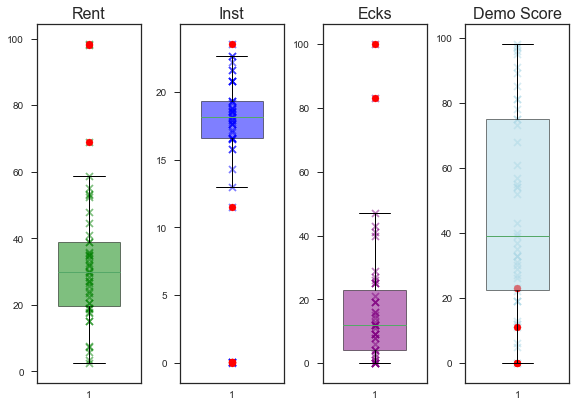

In [4]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4)
fig.tight_layout(pad=0.4)
## Rent
rent_plt_data = ax1.boxplot(russ_df['rent'],widths = 0.6,patch_artist=True,boxprops=dict(facecolor="green",alpha=0.5))
ax1.scatter(np.ones_like(russ_df['rent']), russ_df['rent'], marker='x', label='all',alpha=0.5,c="green")
### Find Outliers
mask1 = russ_df['rent'].isin(rent_plt_data['fliers'][0].get_data()[1])
rent_scatter_out = russ_df[mask1]
### Plot outliers for rent
ax1.scatter(np.ones_like(rent_scatter_out['rent']),rent_scatter_out['rent'],c='red')
## Inst
inst_plt_data = ax2.boxplot(russ_df['inst'],widths = 0.6,patch_artist=True,boxprops=dict(facecolor="blue",alpha=0.5))
ax2.scatter(np.ones_like(russ_df['inst']), russ_df['inst'], marker='x', label='all',alpha=0.5,c="blue")
### Find Outliers
mask3 = russ_df['inst'].isin(inst_plt_data['fliers'][0].get_data()[1])
inst_scatter_out = russ_df[mask3]
ax2.scatter(np.ones_like(inst_scatter_out['inst']),inst_scatter_out['inst'],c='red')
### ecks
ecks_plt_data = ax3.boxplot(russ_df['ecks'],widths = 0.6,patch_artist=True,boxprops=dict(facecolor="purple",alpha=0.5))
ax3.scatter(np.ones_like(russ_df['ecks']), russ_df['ecks'], marker='x', label='all',alpha=0.5,c="purple")
mask4 = russ_df['ecks'].isin(ecks_plt_data['fliers'][0].get_data()[1])
ecks_scatter_out = russ_df[mask4]
ax3.scatter(np.ones_like(ecks_scatter_out['ecks']),ecks_scatter_out['ecks'],c='red')
### demo_score
demo_score_plt_data = ax4.boxplot(russ_df['demo_score'],widths = 0.6,patch_artist=True,boxprops=dict(facecolor="lightblue",alpha=0.5))
ax4.scatter(np.ones_like(russ_df['demo_score']), russ_df['demo_score'], marker='x', label='all',alpha=0.5,c="lightblue")

mask2 = russ_df['demo_score'].isin(inst_plt_data['fliers'][0].get_data()[1] )
ds_scatter_out = russ_df[mask2]
ax4.scatter(np.ones_like(ds_scatter_out['demo_score']),ds_scatter_out['demo_score'],c='red')

## Formatting changes
ax1.set_ylabel('')
ax1.set_title('Rent',fontsize=16)
ax1.tick_params(axis='x', which='both',length=0)
ax2.set_ylabel('')
ax2.set_title('Inst',fontsize=16)
ax2.tick_params(axis='x', which='both',length=0)
ax3.set_ylabel('')
ax3.set_title('Ecks',fontsize=16)
ax3.tick_params(axis='x', which='both',length=0)
ax4.set_ylabel('')
ax4.set_title('Demo Score',fontsize=16)
ax4.tick_params(axis='x', which='both',length=0)

#### Note: Outliers have been marked in red on the box plots above.

#### (ii) Scatterplots

Generate 3 scatterplots of "rent" against "demo_score", "inst" against "demo_score" and "ecks" against "demo_score" with the identified outliers colored differently than non-outliers in each; comment on how inclusion of the outliers would affect a predictive model for the "demo_score" response.

In [5]:
## mask 1,2,3,4 used from previous chunk.
re_ds_df = russ_df[mask1 | mask2]
int_ds_df = russ_df[mask3 | mask2]
ecks_ds_df = russ_df[mask4 | mask2]

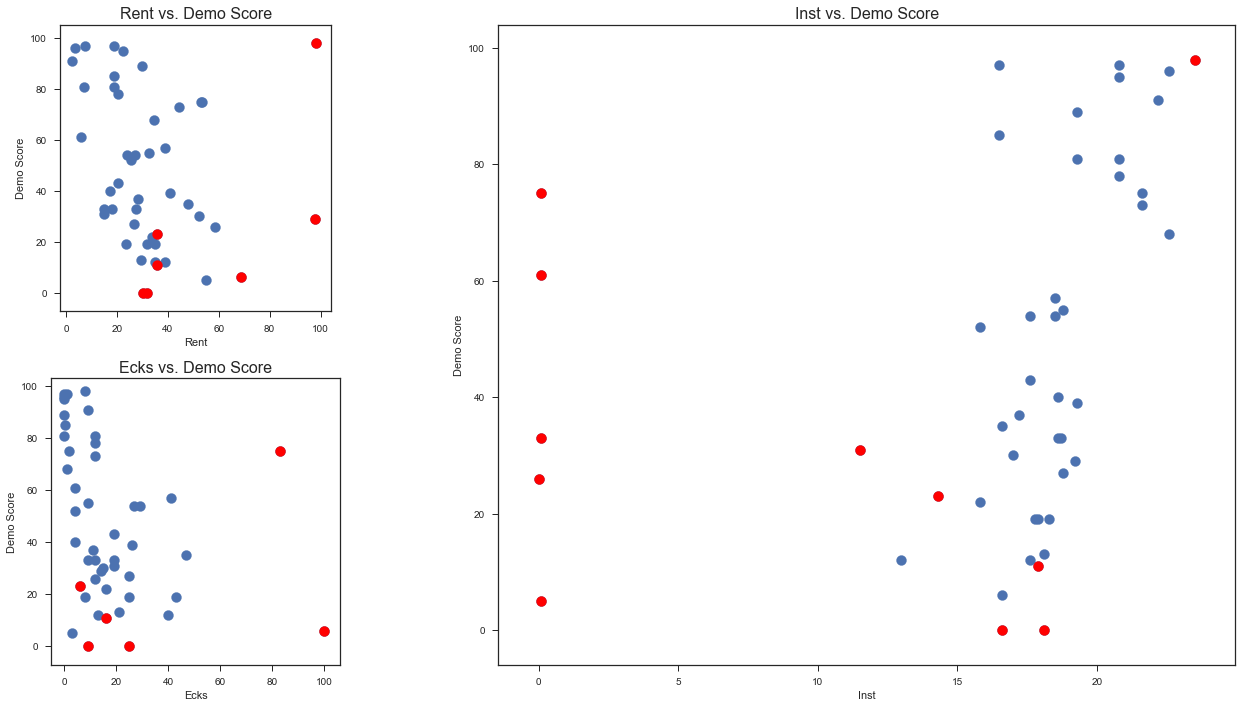

In [6]:
## Rent vs. Demo_Score
plt.figure(figsize=(20,10))
## Rent vs. Demo_Score
ax1 = plt.subplot(221,aspect='equal')
ax1.scatter(x='rent', y='demo_score', data=russ_df, s=100) 
ax1.scatter(x='rent',y='demo_score',data=re_ds_df, s=100,color="red") 
ax1.set_title('Rent vs. Demo Score',fontsize=16)
plt.xlabel('Rent')
plt.ylabel('Demo Score')
## Ecks vs. Demo_Score
ax2 = plt.subplot(223,aspect='equal')
ax2.scatter(x='ecks', y='demo_score', data=russ_df, s=100) 
ax2.scatter(x='ecks',y='demo_score',data=ecks_ds_df, s=100,color="red") 
ax2.set_title('Ecks vs. Demo Score',fontsize=16)
plt.xlabel('Ecks')
plt.ylabel('Demo Score')
## Inst vs. Demo_Score
ax3 = plt.subplot(122)
ax3.scatter(x='inst', y='demo_score', data=russ_df, s=100) 
ax3.scatter(x='inst',y='demo_score',data=int_ds_df, s=100,color="red") 
ax3.set_title('Inst vs. Demo Score',fontsize=16)
plt.xlabel('Inst')
plt.ylabel('Demo Score')
plt.tight_layout()
plt.show()

### PART B

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

X = russ_df[['rent', 'inst', 'ecks']]
y = russ_df['demo_score']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=22)

In [8]:
reg = linear_model.LinearRegression()
result = reg.fit(X_train, y_train)

result_y_train_pred = result.predict(X_train)
result_y_pred = result.predict(X_test)

In [9]:
in_sample_rmse = (mean_squared_error(y_train,result_y_train_pred))**0.5
oos_rmse = (mean_squared_error(y_test, result_y_pred))**0.5
print "(In sample) Root mean squared error is: %.2f" % in_sample_rmse
print "(Out of sample) Root mean squared error: %.2f" % oos_rmse
print "The score increase is %.2f" % (oos_rmse-in_sample_rmse)

(In sample) Root mean squared error is: 25.78
(Out of sample) Root mean squared error: 32.58
The score increase is 6.80


We see that when we run the regression on X_test vs. X_train, the RMSE increases from 25.78 to 32.58. The difference in RMSE is an increase of 6.80. This tells us that the model is slightly overfit to the training data.

### PART C

In [10]:
huber = linear_model.HuberRegressor(alpha=0)
result_huber = huber.fit(X_train,y_train)

result_y_train_pred_huber = result_huber.predict(X_train)
result_y_pred_huber = result_huber.predict(X_test)

In [11]:
in_sample_rmse = (mean_squared_error(y_train,result_y_train_pred_huber))**0.5
oos_rmse = (mean_squared_error(y_test, result_y_pred_huber))**0.5
print "(In sample) Root mean squared error is: %.2f" % in_sample_rmse
print "(Out of sample) Root mean squared error: %.2f" % oos_rmse
print "The score increase is %.2f" % (oos_rmse-in_sample_rmse)

(In sample) Root mean squared error is: 26.84
(Out of sample) Root mean squared error: 29.17
The score increase is 2.33


We see that when we run the regression on X_test vs. X_train, the RMSE increases from 26.84 to 29.17. The difference in RMSE here is an increase of 2.33. Again, this tells us that the model is slightly overfit to the training data.

### PART D

#### Multiple Linear Regression

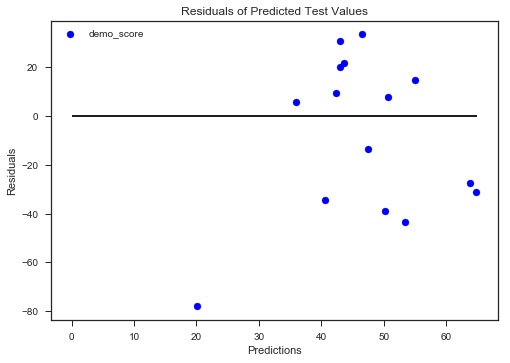

In [12]:
plt.scatter(result_y_pred, result_y_pred-y_test, color='blue')
plt.hlines(y=0, xmin = 0, xmax = 65)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Residuals of Predicted Test Values')
plt.legend(numpoints = 1, loc='upper left')
plt.show()

From the above residual plot, we can see the presence of one strong outlier at approximately (20, -80). This outlier likely skews the RMSE substantially. Otherwise, we see two distinct clusters of points that represent the demo_score.

It is also notable that OLS can be dominated by outliers, therefore the sample mean is inflated as a result of the presence of outliers (i.e high values). We should expect greater Mean Squared Error (MSE) values when regressing without pre-processing data, which includes the removal of outliers.  

#### Robust Regression (Huber)

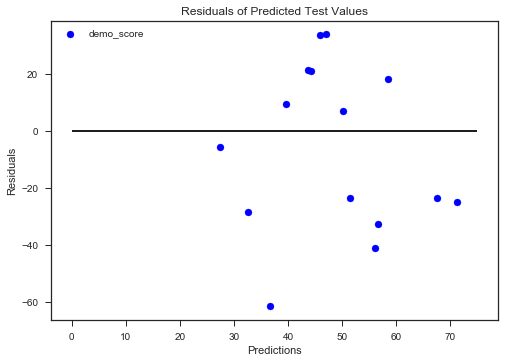

In [13]:
plt.scatter(result_y_pred_huber, result_y_pred_huber-y_test, color='blue')
plt.hlines(y=0, xmin = 0, xmax = 75)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Residuals of Predicted Test Values')
plt.legend(numpoints = 1, loc='upper left')
plt.show()

In general, the Huber loss is less sensitive to outliers as compared to MSE measured after performing OLS. From the above plot, we can see that this is indeed true. The three data points the the left under the zero line could be considered outliers, but we can see that the magnitude of the residuals only maxes out at roughly -60. This is less in magnitude as compared to OLS. Overall, the robust regression does indeed provide a lower RMSE.

# Question 3 - Sampling (4+4=8pts)

1. NBC has come up with an extreme TV show, and each of its viewers either likes or hates it. (no middle ground here; we are in a “black and white age”). NBC wants to estimate what fraction p of its audience like the show by “randomly” calling n viewers and tallying their responses so as to estimate the true value of p to a fractional accuracy of within ±ε%, with a confidence of (1 − α) × 100%. For α = 0.10, ε = 0.03 (i.e. your answer will be $\hat{p}$ ± 0.03), what is the minimum value of n needed if true value (i) p = 0.5, (ii) p=0.25? 

2. Suppose for a certain value of p and choice of ε, you calculate that you will need 1000 samples for α = 0.02. You now decide to obtain a more accurate answer by either (i) reducing α to 0.01, keeping the same ε or by (ii) reducing ε by a factor of 2 from the original value, and increasing α to 0.05. In each case how many samples would you need now?

## Answer

Using the following formula:

$$ \epsilon = z * \sqrt{\dfrac{p(1-p)}{n}} $$ 

Where $\epsilon$ = Margin of Error, Z = Z score for a set confidence interval, and p is the fraction of the audience. With algebra we are able to solve for n:

$$ n = p * (1-p) * (\dfrac{z}{\epsilon})^2 $$

#### 1 Part (i)

In [14]:
import math
print "The required sample size is: %d" % math.ceil(0.5*(1-0.5)*(1.645/0.03)**2)

The required sample size is: 752


#### 1 Part (ii)

In [15]:
import math
print "The required sample size is: %d" % math.ceil(0.25*(1-0.25)*(1.645/0.03)**2)

The required sample size is: 564


#### 2 Part (i)

For the original 1000 samples, the formula is roughly: 
$$ 1000 = p*(1-p)*(\dfrac{2.33}{ME})^2 $$

2.33 is a z-score of 98%, as suggested by the alpha to 0.02. 

By reducing the alpha to 0.01, the z-score becomes 2.58. Thus, we get:
$$ n = p*(1-p)*(\dfrac{2.58}{ME})^2 $$

By taking the ratios of $$ \dfrac{(\dfrac{2.58}{ME})^2}{(\dfrac{2.33}{ME})^2} $$


This resulting ratio then identifies the ratio of additional samples we will require in order to obtain the new desired accuracy of 99%.

In [16]:
import math
org_samples = 1000
tot_samples = (1000*(2.58**2)/(2.33**2))
print "In this case we will require %d samples." % math.ceil(tot_samples)
print '\033[1m' + "Therefore we will need " + str(math.ceil(tot_samples) - org_samples) + " more samples." + '\033[0m'

In this case we will require 1227 samples.
Therefore we will need 227.0 more samples.


#### 2 Part (ii)

In this case, alpha is increased to 0.05, resulting in a 95% confidence interval. The z-score drops to 1.96. We will also reduce the $\epsilon$ by a factor of 2.

$$ n = p*(1-p)*(\dfrac{1.96}{ME/2})^2 $$ 

$$ n = p*(1-p)*(\dfrac{1.96*2}{ME})^2 $$

By taking the ratios of $$ \dfrac{(\dfrac{1.96*2}{ME})^2}{(\dfrac{2.33}{ME})^2} $$

This resulting ratio then identifies the ratio of additional samples required.

In [17]:
org_samples = 1000
tot_samples = 1000*((1.96*2)**2)/(2.33**2)
print "In this case we will require %d samples." % math.ceil(tot_samples)
print '\033[1m' + "Therefore we will need " + str(math.ceil(tot_samples) - org_samples) + " more samples." + '\033[0m'

In this case we will require 2831 samples.
Therefore we will need 1831.0 more samples.


# Question 4 - Principal Component Analysis (10 points)

Import the diabetes dataset as in Q1 and add the interaction variables.
You should have 65 variables and one target variable.

In [18]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(2, include_bias=False).fit_transform(X)

Next, use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to center and scale each feature as follows.

In [19]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
X = stdScaler.fit_transform(X)

(a) Perform PCA using the sklearn [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) package.  Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the principal components of the data (X matrix).  Refer to Figure 10.4 of JW for an example.  You may use the output attribute *explained variance ratio*. (3pts)

(b) How many principal components (N1, N2, N3) are required to explain cumulative variance of 30%, 60%, and 90%, respectively? (3pts)

(c) Fit an ordinary least squares linear regression using N1, N2, and N3 number of principal components, respectively. (This is called Principal Components Regression) Use entire dataset, e.g. 442 rows. Evaluate the models using mean squared error (MSE). (4pts)

## Answer

#### Part (a)

In [20]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

#### Part (a) - (i)

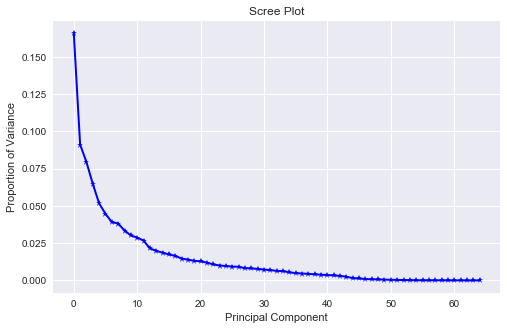

In [21]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(8,5))
plt.plot(pca.explained_variance_ratio_, 'b*-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance')
plt.show()

#### Part (a) - (ii)

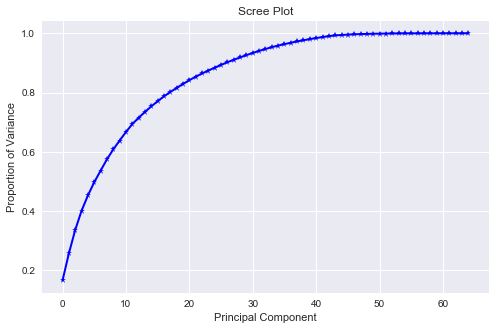

In [22]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(8,5))
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_variance, 'b*-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance')
plt.show()

#### Part (b) 

In [23]:
print "To explain a cumulative variance of 30 percent we will need %d principal components." % (len(cumulative_variance[np.where( cumulative_variance <= .30 )]) + 1)
print "To explain a cumulative variance of 60 percent we will need %d principal components." % (len(cumulative_variance[np.where( cumulative_variance <= .60 )]) + 1)
print "To explain a cumulative variance of 90 percent we will need %d principal components." % (len(cumulative_variance[np.where( cumulative_variance <= .90 )]) + 1)

To explain a cumulative variance of 30 percent we will need 3 principal components.
To explain a cumulative variance of 60 percent we will need 9 principal components.
To explain a cumulative variance of 90 percent we will need 27 principal components.


#### Part (c) 

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### N1 = 3

In [25]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [26]:
reg = LinearRegression()
result = reg.fit(X_pca,y)
result_y_pred = reg.predict(X_pca)

print("Mean squared error: %.2f" % mean_squared_error(y, result_y_pred))

Mean squared error: 5120.61


### N2 = 9

In [27]:
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X)

In [28]:
reg = LinearRegression()
result = reg.fit(X_pca,y)
result_y_pred = reg.predict(X_pca)

print("Mean squared error: %.2f" % mean_squared_error(y, result_y_pred))

Mean squared error: 3942.79


### N3 = 27

In [29]:
pca = PCA(n_components=27)
X_pca = pca.fit_transform(X)

In [30]:
reg = LinearRegression()
result = reg.fit(X_pca,y)
result_y_pred = reg.predict(X_pca)

print("Mean squared error: %.2f" % mean_squared_error(y, result_y_pred))

Mean squared error: 2857.43


# Question 5 -  Feature Selection ( 5 points )

Explain what you understand by the two wrapper methods for feature selection (forward and backward selection) (no more than 1 paragraph). 


### Answer

Both wrapper methods are used for variable selection. In forward selection, we begin with the null model and fit `p` simple linear regressions and add to the null model until we have the lowest RSS, which measures the amount of variability that is left unexplained after performing the regression. Comparatively in backward selection, all variables are included in the model and we remove the variable with the largest p-value in an iterative process until a stopping rule is reached. Forward selection can always be used, but generally is considered more "greedy", since we may include variables early that later become redundant.